## **Heart-disease-prediction**



Heart disease is a debilitating disease that affect many people around the world. Heart disease is an umbrella term that consists of other conditions that produce diseased vessels, structural problems and blood clots within heart structure. The symptoms of heart disease vary depending on the type of condition afflicting the patient. Each year heart disease is the leading cause of death in both men and women, affecting about 370,000 people.



**This project is to just show some of the steps that could be taken analyzing a dataset using the heart disease dataset.**

## **Steps:**
- Importing Libraries
- Uploading  dataset
- Analyze dataset 
- Building model
- Training model and validating model

- Conclusion

## **Importing required Libraries**

In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from pandas import set_option

## **Uploading dataset**

The dataset that we will be using is a dataset from the UCI Machine Learning repository via a Kaggle competition. The data has been provided by the Cleveland Clinic Foundation. The dataset consists of patients ranging in age from 29 - 77 years old. There are a total of 303 instances and 14 attributes including our target variable of “presence” of heart disease. 

**Attributes**


1.   sex:     sex (1 = male; 0 = female)
2.   age:     age in years
3.   cp :     chest pain type
4.   trestb:  psresting blood pressure (in mm Hg on admission to the hospital)
5.   chol:    serum cholestoral in mg/dl
6.   fbs:     (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7.   restecg: resting electrocardiographic results
8.   thalach: maximum heart rate achieved
9.   exang:   exercise induced angina (1 = yes; 0 = no)
10.  oldpeak: ST depression induced by exercise relative to rest
11.  slope:   The slope of the peak exercise ST segment
12.  ca:      Number of major vessels (0-3) colored by flourosopy
13.  thal:    3 = normal; 6 = fixed defect; 7 = reversable defect
14.  target:  1 or 0 (0: No Disease, 1: Disease)






In [0]:
#Reading dataset using pandas dat frame
data = pd.read_csv('/content/heart.csv')


In [4]:
#Display the top 5 rows and column
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Describe the data using describe method       
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Lets see if dataset has any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Here there are no missing values.

## **Analyze data**

The dataset consists of patients ranging in age from 29 - 77 years old. There are a total of 303 instances and 14 attributes including our target variable. 




**Analyze the target  variable**

1    165
0    138
Name: target, dtype: int64


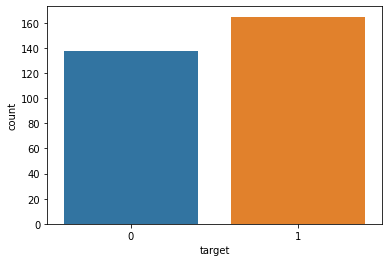

In [7]:
#Draw Bar graph of count distribution of target variable
y = data["target"]
sns.countplot(y)
target = data.target.value_counts()
print(target)

**Analyze dataset using histogram**

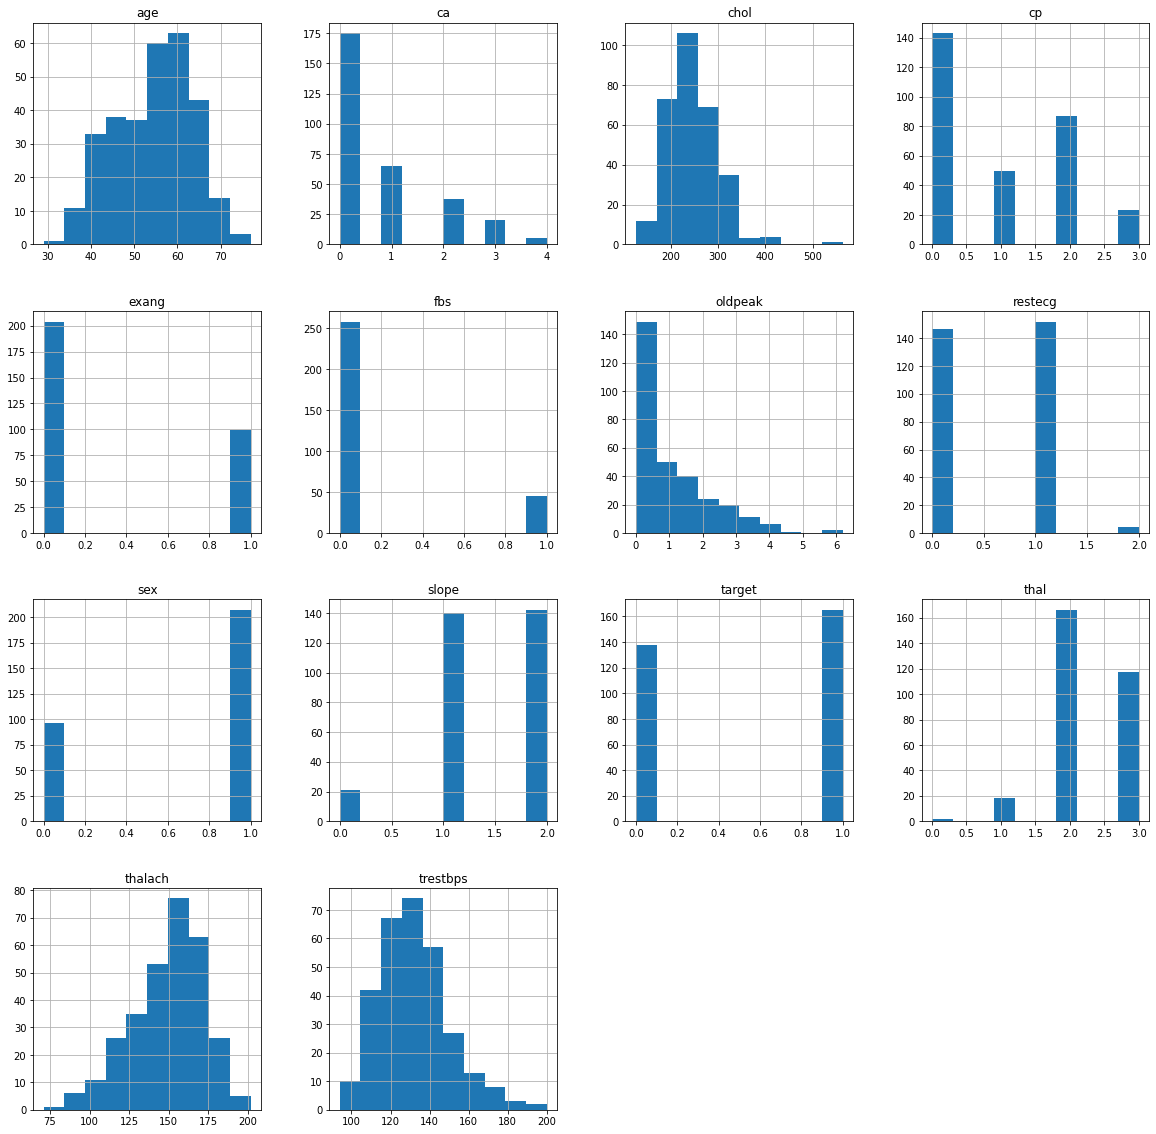

In [8]:
#Analyze whole dataset using Histogram
data.hist(figsize=(20,20))
plt.show()

**Analyze data using box plot**

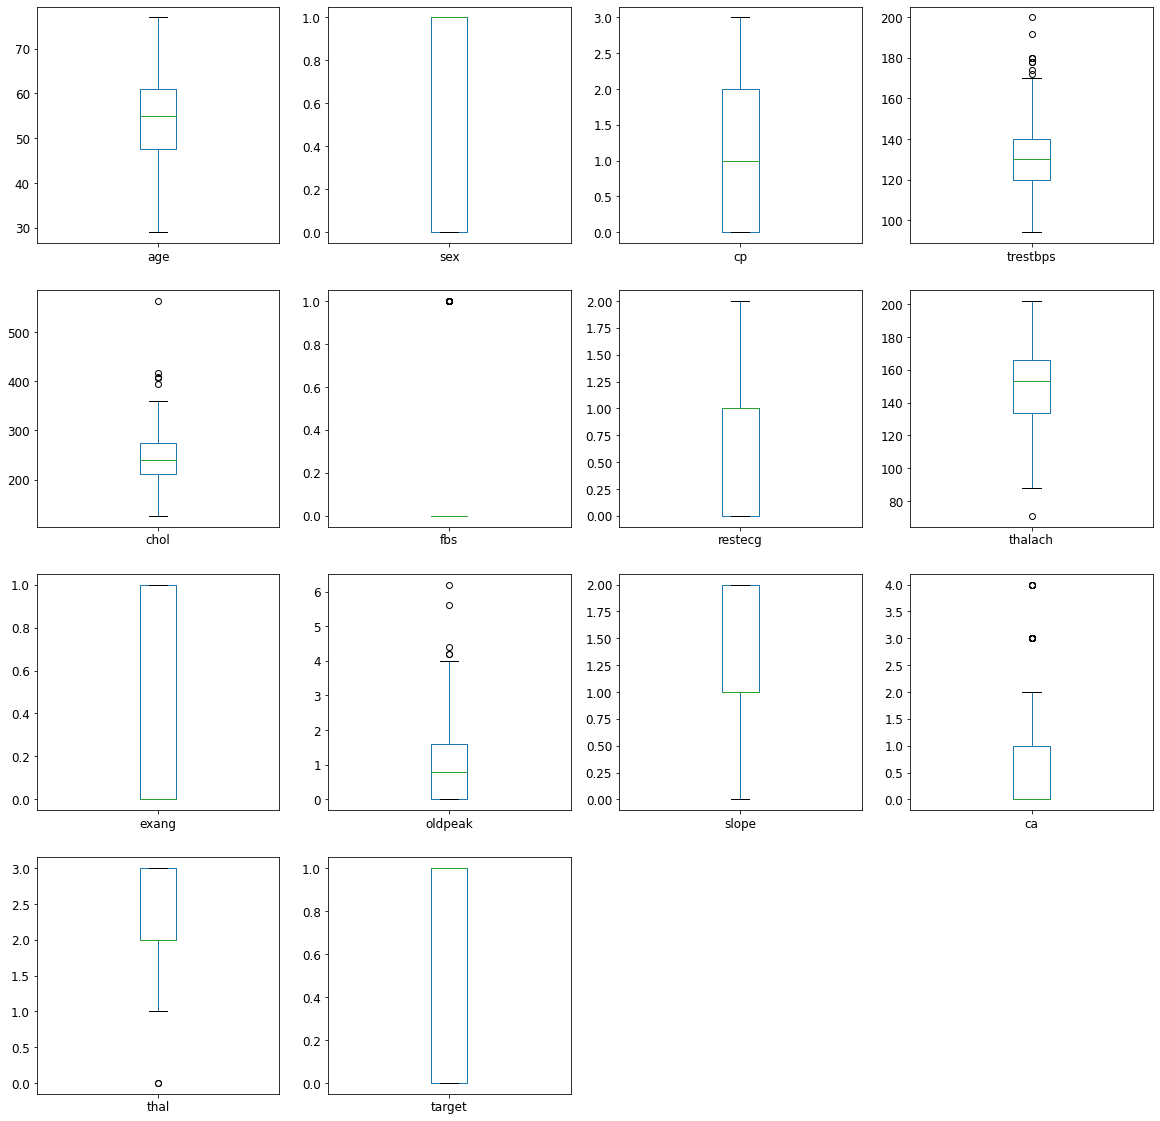

In [9]:
#Analyze whole data using Box plot
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(20,20),fontsize=12)
plt.show()

**Analyze the Sex variable wrt target variable**

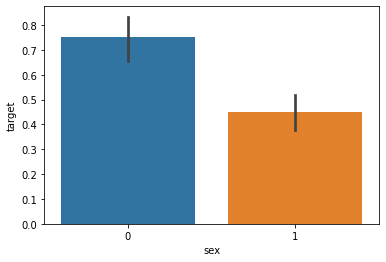

In [10]:
# Plot Bar graph with x axis represnting sex and y axis representing target
sns.barplot(data["sex"],data["target"])


*We notice, that females are more likely to have heart problems than males*

**Analyze slope feature  wrt target**

In [11]:
# Describe unique values of slope variable
data["slope"].unique()

array([0, 2, 1])

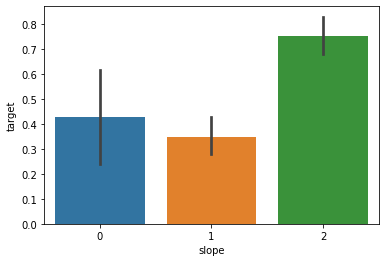

In [12]:
# Plot Bar graph with x axis represnting slope and y axis representing target
sns.barplot(data["slope"],y)

*We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'*


**Analysing the 'ca' feature wrt target**


In [13]:
#Describe unique value of ca
data["ca"].unique()

array([0, 2, 1, 3, 4])

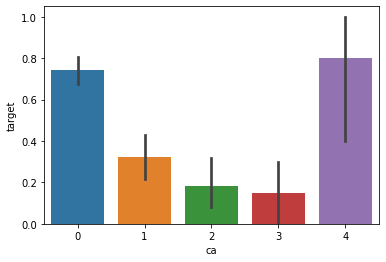

In [14]:
# Plot Bar graph with x axis represnting ca and y axis representing target
sns.barplot(data["ca"],data["target"])

*ca=4 and c=0 has astonishingly large number of heart patients*



**Corelation Matrices**

A much more common metric, and one directly calculable from the covariance, is the correlation.

In [29]:
set_option('precision', 2) 
print(data.corr(method='pearson'))

           age   sex    cp  trestbps  ...     slope    ca  thal  target
age       1.00 -0.10 -0.07      0.28  ... -1.69e-01  0.28  0.07   -0.23
sex      -0.10  1.00 -0.05     -0.06  ... -3.07e-02  0.12  0.21   -0.28
cp       -0.07 -0.05  1.00      0.05  ...  1.20e-01 -0.18 -0.16    0.43
trestbps  0.28 -0.06  0.05      1.00  ... -1.21e-01  0.10  0.06   -0.14
chol      0.21 -0.20 -0.08      0.12  ... -4.04e-03  0.07  0.10   -0.09
fbs       0.12  0.05  0.09      0.18  ... -5.99e-02  0.14 -0.03   -0.03
restecg  -0.12 -0.06  0.04     -0.11  ...  9.30e-02 -0.07 -0.01    0.14
thalach  -0.40 -0.04  0.30     -0.05  ...  3.87e-01 -0.21 -0.10    0.42
exang     0.10  0.14 -0.39      0.07  ... -2.58e-01  0.12  0.21   -0.44
oldpeak   0.21  0.10 -0.15      0.19  ... -5.78e-01  0.22  0.21   -0.43
slope    -0.17 -0.03  0.12     -0.12  ...  1.00e+00 -0.08 -0.10    0.35
ca        0.28  0.12 -0.18      0.10  ... -8.02e-02  1.00  0.15   -0.39
thal      0.07  0.21 -0.16      0.06  ... -1.05e-01  0.15  1.00 

##**Building Model**

**Train-test split**

In [0]:
x = data.drop("target",axis=1)
y = data["target"]
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [16]:
#Shape of train dataset
X_train.shape

(242, 13)

In [17]:
#Shape of target train dataset
Y_train.shape

(242,)

In [18]:
#Shape of test dataset
X_test.shape

(61, 13)

In [19]:
#Shape of target test dataset
Y_test.shape

(61,)

**K Nearest Neighbors**


In [0]:
#Build KNN model using Inbuilt classifier scikit learn
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

**Neural Network**

In [0]:
# Build Neural network using keras
model = Sequential()
model.add(Dense(7,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
#Show the summary of the  Neural network  model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 7)                 98        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


##**Training and Validating Model**

**K Nearest Neighbours**

In [23]:
# Accuracy Score 
score_knn = round(accuracy_score(Y_test,Y_pred_knn)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


**Neural Network**

In [24]:
# Train your neural network with 250 epochs
model.fit(X_train, Y_train, epochs=250, validation_data=(X_test, Y_test))

Train on 242 samples, validate on 61 samples
Epoch 1/250
242/242 [==============================] - 0s 1ms/step - loss: 29.1294 - accuracy: 0.4587 - val_loss: 25.8835 - val_accuracy: 0.4426
Epoch 2/250
242/242 [==============================] - 0s 66us/step - loss: 24.7124 - accuracy: 0.4587 - val_loss: 21.3832 - val_accuracy: 0.4426
Epoch 3/250
242/242 [==============================] - 0s 67us/step - loss: 20.1920 - accuracy: 0.4587 - val_loss: 16.8428 - val_accuracy: 0.4426
Epoch 4/250
242/242 [==============================] - 0s 64us/step - loss: 15.6996 - accuracy: 0.4587 - val_loss: 12.3067 - val_accuracy: 0.4590
Epoch 5/250
242/242 [==============================] - 0s 59us/step - loss: 10.9741 - accuracy: 0.4587 - val_loss: 7.9012 - val_accuracy: 0.4754
Epoch 6/250
242/242 [==============================] - 0s 60us/step - loss: 6.7996 - accuracy: 0.5331 - val_loss: 4.0843 - val_accuracy: 0.6066
Epoch 7/250
242/242 [==============================] - 0s 60us/step - loss: 3.8696 

In [0]:
# Calculate the achieved accuracy
Y_pred_nn = model.predict(X_test)
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded

In [26]:
# Print the Accuracy achieved using Neural Network
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)
print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 81.97 %


##**Conclusion**

After analyzing the data and applying KNN and Neural Network we have concluded that the accuracy achieved using Neural network is 81 percent which is higher than KNN.